In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("UNHCR Region Data 2023-2024.csv")
print(df.columns.to_list())

['yr', 'quarter', 'CountryofAsylum', 'remoteorinperson', 'stafforpartner', 'nationality', 'DepartureDate', 'ArriveThiscountry', 'ArriveThisplace', 'TransportMethod', 'TransportMethod_bus', 'TransportMethod_taxi', 'TransportMethod_car', 'TransportMethod_plane', 'TransportMethod_boat', 'TransportMethod_walk', 'TransportMethod_hitchHiking', 'TransportMethod_other', 'progres_groupsize', 'Childinschool', 'Childvirtualed', 'Childwhynotschool', 'Childwhynotschool_nodocs', 'Childwhynotschool_nomoney', 'Childwhynotschool_failedschool', 'Childwhynotschool_childwork', 'Childwhynotschool_fearschool', 'Childwhynotschool_disease', 'Childwhynotschool_disability', 'Childwhynotschool_helphome', 'Childwhynotschool_familynot', 'Childwhynotschool_noschools', 'Childwhynotschool_nointerest', 'Childwhynotschool_pregnancy', 'Childwhynotschool_nospot', 'Childwhynotschool_notransport', 'Childwhynotschool_discrimnation', 'Childwhynotschool_discrimethnic', 'Childwhynotschool_childrecruit', 'Childwhynotschool_fini

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_21370/818477168.py:1: DtypeWarning: Columns (125,132) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("UNHCR Region Data 2023-2024.csv")


In [13]:
# List of relevant columns (reasons for not attending school)
reason_cols = [
    'Childwhynotschool_nodocs', 'Childwhynotschool_nomoney', 'Childwhynotschool_failedschool',
    'Childwhynotschool_childwork', 'Childwhynotschool_fearschool', 'Childwhynotschool_disease',
    'Childwhynotschool_disability', 'Childwhynotschool_helphome', 'Childwhynotschool_familynot',
    'Childwhynotschool_noschools', 'Childwhynotschool_nointerest', 'Childwhynotschool_pregnancy',
    'Childwhynotschool_nospot', 'Childwhynotschool_notransport', 'Childwhynotschool_discrimnation',
    'Childwhynotschool_discrimethnic', 'Childwhynotschool_childrecruit', 'Childwhynotschool_finished',
    'Childwhynotschool_recentlyarrive', 'Childwhynotschool_intransit', 'Childwhynotschool_noinfo',
    'Childwhynotschool_toolate', 'Childwhynotschool_nolanguage', 'Childwhynotschool_other'
]

# Group by year and region, summing responses (assuming 1 = response given)
grouped = df.groupby(['yr', 'region_code'])[reason_cols].sum().reset_index()

# Calculate total respondents per group (assuming each row is a respondent)
# Or you can adjust if you have a column like `weight` or `respondent_id`
df['total_respondents'] = 1  # Add a helper column
respondents = df.groupby(['yr', 'region_code'])['total_respondents'].sum().reset_index()

# Merge summed data with total respondents
merged = pd.merge(grouped, respondents, on=['yr', 'region_code'])

# Calculate % of respondents for each reason
for col in reason_cols:
    merged[col + '_pct'] = merged[col] / merged['total_respondents'] * 100

In [14]:
merged.head()

,yr,region_code,Childwhynotschool_nodocs,Childwhynotschool_nomoney,Childwhynotschool_failedschool,Childwhynotschool_childwork,Childwhynotschool_fearschool,Childwhynotschool_disease,Childwhynotschool_disability,Childwhynotschool_helphome,...,Childwhynotschool_discrimnation_pct,Childwhynotschool_discrimethnic_pct,Childwhynotschool_childrecruit_pct,Childwhynotschool_finished_pct,Childwhynotschool_recentlyarrive_pct,Childwhynotschool_intransit_pct,Childwhynotschool_noinfo_pct,Childwhynotschool_toolate_pct,Childwhynotschool_nolanguage_pct,Childwhynotschool_other_pct
0,2023.0,Antioquia,14.0,17.0,2.0,0.0,1.0,1.0,2.0,0.0,...,0.274725,0.000000,0.0,0.274725,4.670330,0.274725,1.098901,4.670330,0.0,1.098901
1,2023.0,Arauca,41.0,46.0,3.0,2.0,2.0,2.0,4.0,2.0,...,0.000000,0.000000,0.0,0.000000,3.490760,0.410678,2.669405,1.642710,0.0,1.026694
2,2023.0,Bogotá D.C.,26.0,19.0,3.0,2.0,1.0,0.0,2.0,1.0,...,0.422833,0.211416,0.0,0.422833,2.748414,0.422833,0.422833,1.902748,0.0,0.211416
3,2023.0,Cauca,4.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.724638,0.000000,0.0,0.000000,0.724638,0.000000,0.000000,1.449275,0.0,0.724638
4,2023.0,Cesar,31.0,15.0,1.0,0.0,1.0,2.0,4.0,0.0,...,0.208333,0.000000,0.0,0.625000,2.083333,0.000000,1.250000,1.875000,0.0,1.250000


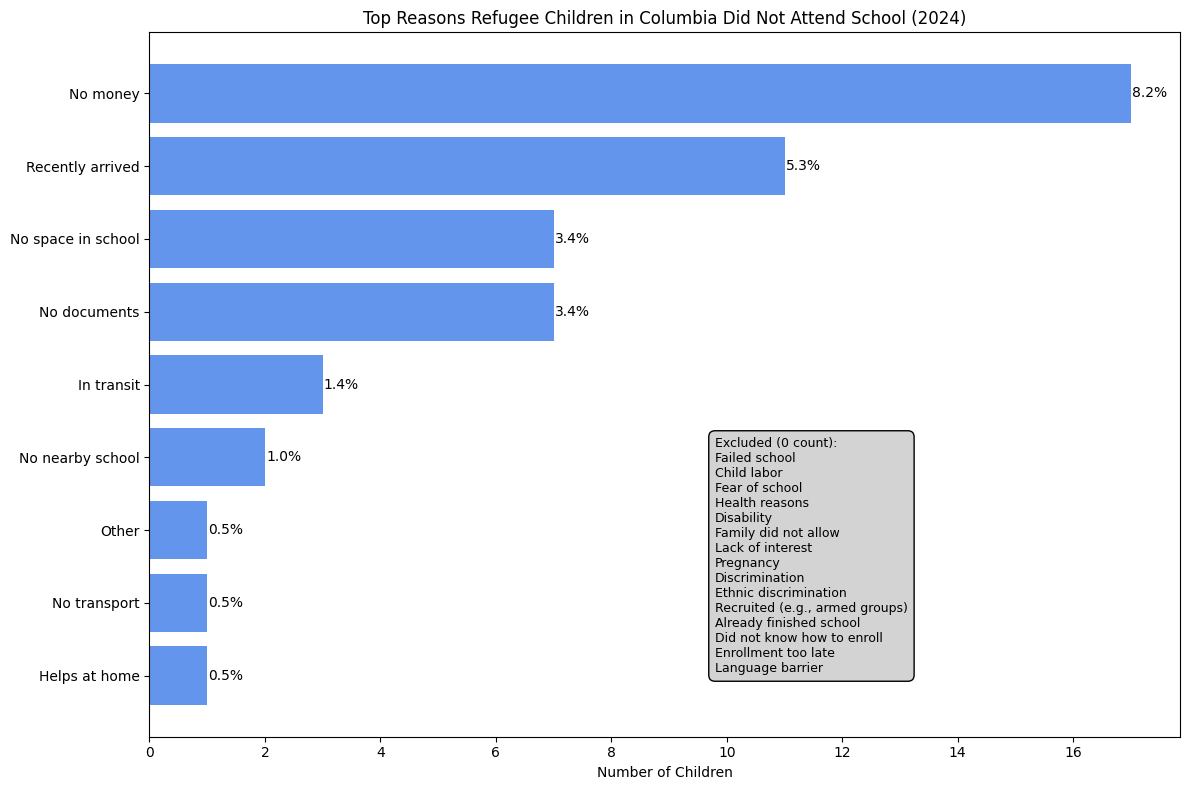

In [84]:
# Filter to year 2024
df_2024 = merged[merged['yr'] == 2024].copy()

# Get counts and percentages
reason_counts = df_2024[reason_cols].iloc[0]
reason_pcts = df_2024[[col + '_pct' for col in reason_cols]].iloc[0]

# Create DataFrame
plot_df = pd.DataFrame({
    'Reason': reason_cols,
    'Count': reason_counts.values,
    'Percentage': reason_pcts.values
})

# Rename for display
name_map = {
    'Childwhynotschool_nomoney': 'No money',
    'Childwhynotschool_nodocs': 'No documents',
    'Childwhynotschool_failedschool': 'Failed school',
    'Childwhynotschool_childwork': 'Child labor',
    'Childwhynotschool_fearschool': 'Fear of school',
    'Childwhynotschool_disease': 'Health reasons',
    'Childwhynotschool_disability': 'Disability',
    'Childwhynotschool_helphome': 'Helps at home',
    'Childwhynotschool_familynot': 'Family did not allow',
    'Childwhynotschool_noschools': 'No nearby school',
    'Childwhynotschool_nointerest': 'Lack of interest',
    'Childwhynotschool_pregnancy': 'Pregnancy',
    'Childwhynotschool_nospot': 'No space in school',
    'Childwhynotschool_notransport': 'No transport',
    'Childwhynotschool_discrimnation': 'Discrimination',
    'Childwhynotschool_discrimethnic': 'Ethnic discrimination',
    'Childwhynotschool_childrecruit': 'Recruited (e.g., armed groups)',
    'Childwhynotschool_finished': 'Already finished school',
    'Childwhynotschool_recentlyarrive': 'Recently arrived',
    'Childwhynotschool_intransit': 'In transit',
    'Childwhynotschool_noinfo': 'Did not know how to enroll',
    'Childwhynotschool_toolate': 'Enrollment too late',
    'Childwhynotschool_nolanguage': 'Language barrier',
    'Childwhynotschool_other': 'Other',
}
plot_df['Reason'] = plot_df['Reason'].map(name_map)

# Separate zero-count reasons
zero_df = plot_df[plot_df['Count'] == 0]
plot_df = plot_df[plot_df['Count'] > 0]

# Sort
plot_df = plot_df.sort_values(by='Count', ascending=True)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(plot_df['Reason'], plot_df['Count'], color='cornflowerblue')

# Add % labels
for bar, pct in zip(bars, plot_df['Percentage']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
             f"{pct:.1f}%", va='center', fontsize=10)

plt.xlabel('Number of Children')
plt.title('Top Reasons Refugee Children in Columbia Did Not Attend School (2024)')
plt.tight_layout()

# Add note box with zero-count reasons
if not zero_df.empty:
    zero_list = zero_df['Reason'].tolist()
    zero_text = "Excluded (0 count):\n" + "\n".join(zero_list)
    plt.gcf().text(0.6, 0.15, zero_text, fontsize=9, va='bottom', ha='left', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray'))

plt.savefig('topreason_noSchool_2024.jpeg')
plt.show()


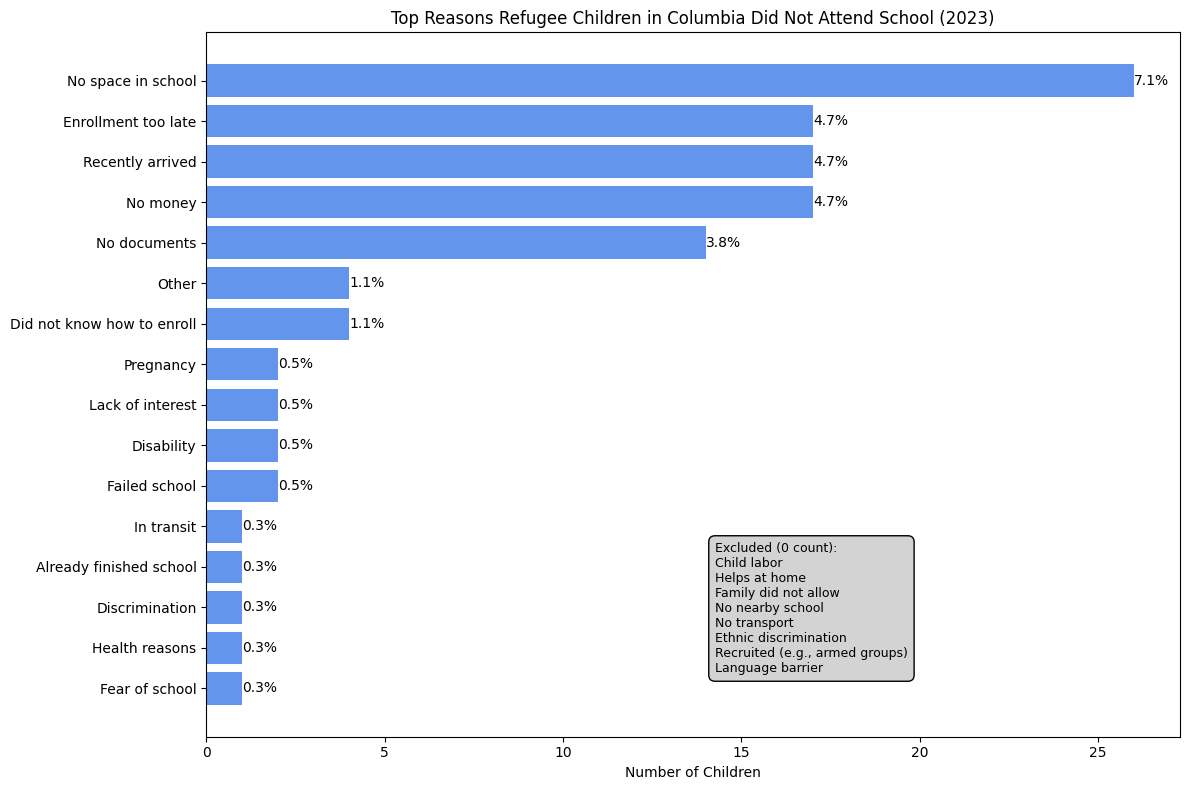

In [86]:
# Filter to year 2024
df_2023 = merged[merged['yr'] == 2023].copy()

# Get counts and percentages
reason_counts = df_2023[reason_cols].iloc[0]
reason_pcts = df_2023[[col + '_pct' for col in reason_cols]].iloc[0]

# Create DataFrame
plot_df = pd.DataFrame({
    'Reason': reason_cols,
    'Count': reason_counts.values,
    'Percentage': reason_pcts.values
})

# Rename for display
name_map = {
    'Childwhynotschool_nomoney': 'No money',
    'Childwhynotschool_nodocs': 'No documents',
    'Childwhynotschool_failedschool': 'Failed school',
    'Childwhynotschool_childwork': 'Child labor',
    'Childwhynotschool_fearschool': 'Fear of school',
    'Childwhynotschool_disease': 'Health reasons',
    'Childwhynotschool_disability': 'Disability',
    'Childwhynotschool_helphome': 'Helps at home',
    'Childwhynotschool_familynot': 'Family did not allow',
    'Childwhynotschool_noschools': 'No nearby school',
    'Childwhynotschool_nointerest': 'Lack of interest',
    'Childwhynotschool_pregnancy': 'Pregnancy',
    'Childwhynotschool_nospot': 'No space in school',
    'Childwhynotschool_notransport': 'No transport',
    'Childwhynotschool_discrimnation': 'Discrimination',
    'Childwhynotschool_discrimethnic': 'Ethnic discrimination',
    'Childwhynotschool_childrecruit': 'Recruited (e.g., armed groups)',
    'Childwhynotschool_finished': 'Already finished school',
    'Childwhynotschool_recentlyarrive': 'Recently arrived',
    'Childwhynotschool_intransit': 'In transit',
    'Childwhynotschool_noinfo': 'Did not know how to enroll',
    'Childwhynotschool_toolate': 'Enrollment too late',
    'Childwhynotschool_nolanguage': 'Language barrier',
    'Childwhynotschool_other': 'Other',
}
plot_df['Reason'] = plot_df['Reason'].map(name_map)

# Separate zero-count reasons
zero_df = plot_df[plot_df['Count'] == 0]
plot_df = plot_df[plot_df['Count'] > 0]

# Sort
plot_df = plot_df.sort_values(by='Count', ascending=True)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(plot_df['Reason'], plot_df['Count'], color='cornflowerblue')

# Add % labels
for bar, pct in zip(bars, plot_df['Percentage']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
             f"{pct:.1f}%", va='center', fontsize=10)

plt.xlabel('Number of Children')
plt.title('Top Reasons Refugee Children in Columbia Did Not Attend School (2023)')
plt.tight_layout()

# Add note box with zero-count reasons
if not zero_df.empty:
    zero_list = zero_df['Reason'].tolist()
    zero_text = "Excluded (0 count):\n" + "\n".join(zero_list)
    plt.gcf().text(0.6, 0.15, zero_text, fontsize=9, va='bottom', ha='left', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray'))

plt.savefig('topreason_noSchool_2023.jpeg')
plt.show()


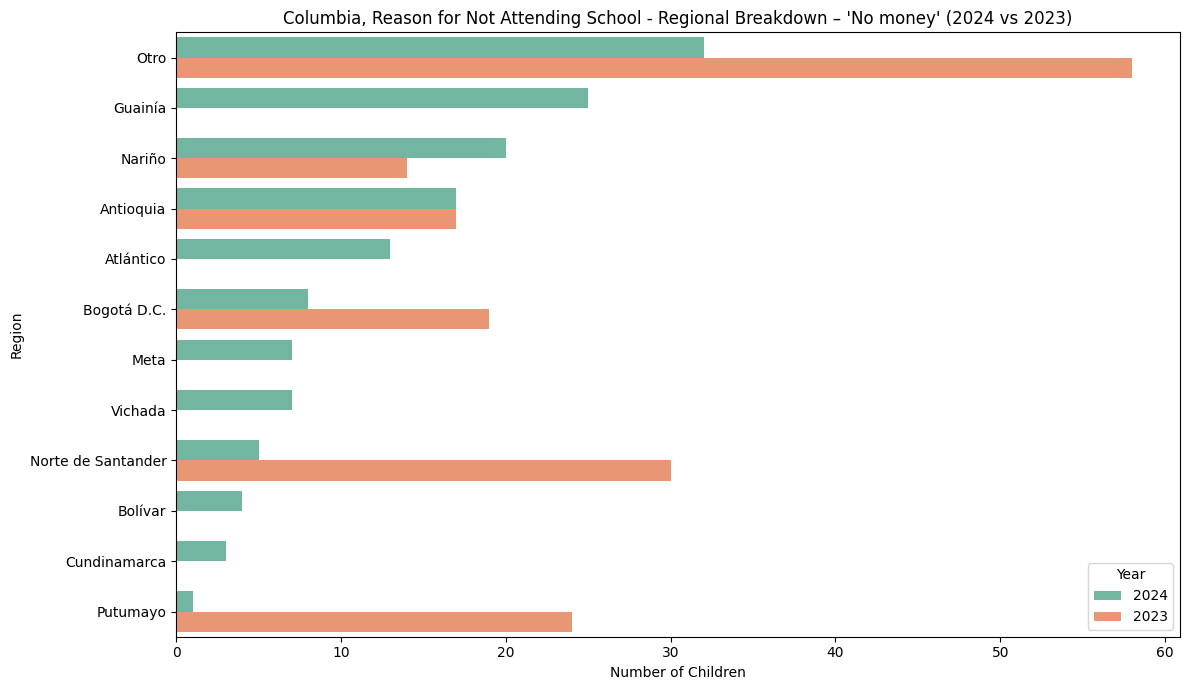

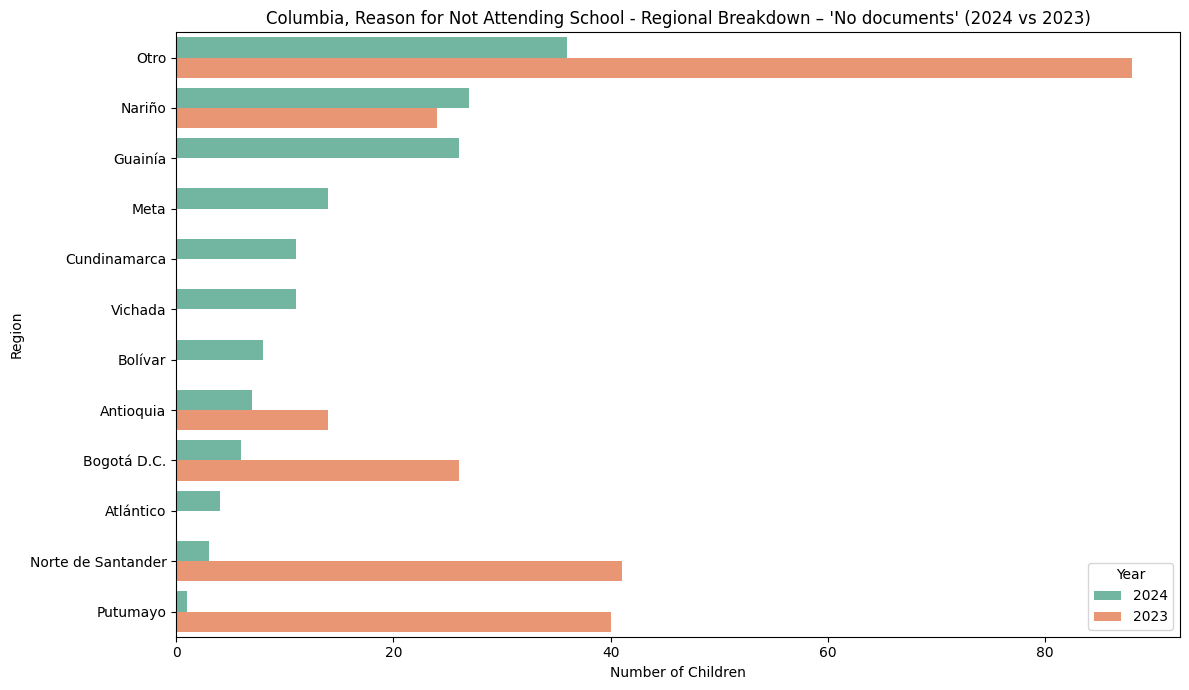

In [81]:
# Make sure year is int (if it's not already)
merged['yr'] = merged['yr'].astype(int)

# Map internal column names to readable labels
reason_map = {
    'Childwhynotschool_nomoney': 'No money',
    'Childwhynotschool_nodocs': 'No documents'
}

# Filter and aggregate
reasons_to_plot = list(reason_map.keys())
plot_data = merged[['yr', 'region_code'] + reasons_to_plot]
agg_df = plot_data.groupby(['yr', 'region_code'])[reasons_to_plot].sum().reset_index()

# Melt to long format
melted_df = agg_df.melt(id_vars=['yr', 'region_code'], var_name='Reason', value_name='Count')
melted_df['Reason'] = melted_df['Reason'].map(reason_map)

# Set custom year order (2024 first)
year_order = [2024, 2023]

# Plot
for reason in melted_df['Reason'].unique():
    df_reason = melted_df[melted_df['Reason'] == reason]

    # Sort by 2024 counts descending
    latest_counts = df_reason[df_reason['yr'] == 2024]
    region_order = latest_counts.sort_values('Count', ascending=False)['region_code']

    plt.figure(figsize=(12, 7))
    sns.barplot(
        data=df_reason,
        x='Count',
        y='region_code',
        hue='yr',
        order=region_order,
        hue_order=year_order,  # <- This makes 2024 appear first
        palette="Set2"
    )

    plt.title(f"Columbia, Reason for Not Attending School - Regional Breakdown – '{reason}' (2024 vs 2023)")
    plt.xlabel("Number of Children")
    plt.ylabel("Region")
    plt.legend(title='Year')
    plt.tight_layout()
    plt.savefig(f'Columbia-NotAttendingSchool_{reason}.jpeg')
    plt.show()


In [48]:
# List of columns representing different incident types
incident_columns = [
    'RouteIncidentType_theft', 'RouteIncidentType_eviction', 'RouteIncidentType_evictionthreat',
    'RouteIncidentType_threat', 'RouteIncidentType_fraud', 'RouteIncidentType_homicide',
    'RouteIncidentType_physicalAssaul', 'RouteIncidentType_sexualAssault', 'RouteIncidentType_abduction',
    'RouteIncidentType_Exploitsex', 'RouteIncidentType_Exploitwork', 'RouteIncidentType_detention',
    'RouteIncidentType_bribery', 'RouteIncidentType_deportation', 'RouteIncidentType_destrProperty',
    'RouteIncidentType_notell', 'RouteIncidentType_other', 'RouteIncidentType_forcedisappear',
    'RouteIncidentType_torture', 'RouteIncidentType_forcedrecruit', 'RouteIncidentType_despojo',
    'RouteIncidentType_displaced', 'RouteIncidentType_confine', 'RouteIncidentType_extors',
    'RouteIncidentnotdisplaced'
]

# Convert all the incident columns to numeric (force any non-numeric values to NaN and then fill NaN with 0)
df[incident_columns] = df[incident_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Aggregate by region and year, summing up the responses (1's for each incident type)
aggregated_df = df.groupby(['yr', 'region_code'])[incident_columns].sum().reset_index()

# Calculate the total number of respondents per region and year
# For each row, we count how many non-zero values are present across all incident columns
df['respondents_per_row'] = df[incident_columns].sum(axis=1)

# Now aggregate the total number of respondents (those who reported any incident) by region and year
aggregated_df['total_respondents'] = df.groupby(['yr', 'region_code'])['respondents_per_row'].sum().reset_index(drop=True)

# Calculate the percentage for each incident type based on total respondents
for column in incident_columns:
    aggregated_df[f'{column}_percentage'] = (aggregated_df[column] / aggregated_df['total_respondents']) * 100

# Display the result
aggregated_df

,yr,region_code,RouteIncidentType_theft,RouteIncidentType_eviction,RouteIncidentType_evictionthreat,RouteIncidentType_threat,RouteIncidentType_fraud,RouteIncidentType_homicide,RouteIncidentType_physicalAssaul,RouteIncidentType_sexualAssault,...,RouteIncidentType_notell_percentage,RouteIncidentType_other_percentage,RouteIncidentType_forcedisappear_percentage,RouteIncidentType_torture_percentage,RouteIncidentType_forcedrecruit_percentage,RouteIncidentType_despojo_percentage,RouteIncidentType_displaced_percentage,RouteIncidentType_confine_percentage,RouteIncidentType_extors_percentage,RouteIncidentnotdisplaced_percentage
0,2023.0,Antioquia,19.0,0.0,0.0,17.0,1.0,3.0,11.0,1.0,...,1.612903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,2023.0,Arauca,38.0,4.0,3.0,19.0,2.0,2.0,13.0,2.0,...,1.562500,12.500000,0.000000,0.000000,0.000000,1.562500,0.000000,0.781250,0.0,0.0
2,2023.0,Bogotá D.C.,45.0,3.0,6.0,40.0,3.0,4.0,34.0,2.0,...,0.000000,7.407407,0.925926,0.000000,0.000000,0.925926,1.388889,1.388889,0.0,0.0
3,2023.0,Cauca,8.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,2023.0,Cesar,18.0,1.0,2.0,17.0,3.0,2.0,11.0,1.0,...,0.000000,4.687500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,2023.0,Chocó,75.0,3.0,1.0,26.0,3.0,7.0,21.0,5.0,...,0.000000,6.989247,1.075269,0.000000,0.537634,0.537634,3.763441,0.537634,0.0,0.0
6,2023.0,Córdoba,5.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,...,0.000000,9.090909,0.000000,0.000000,0.000000,0.000000,0.000000,9.090909,0.0,0.0
7,2023.0,Nariño,53.0,0.0,1.0,22.0,2.0,0.0,10.0,1.0,...,0.000000,2.061856,0.000000,0.000000,1.030928,0.000000,1.030928,0.000000,0.0,0.0
8,2023.0,Norte de Santander,26.0,11.0,4.0,11.0,4.0,2.0,8.0,0.0,...,0.000000,6.722689,0.840336,0.840336,0.840336,5.042017,6.722689,2.521008,0.0,0.0
9,2023.0,Otro,101.0,19.0,12.0,75.0,5.0,17.0,46.0,8.0,...,0.501253,5.263158,0.250627,0.501253,0.501253,2.255639,4.260652,2.756892,0.0,0.0


In [52]:
aggregated_df.columns

Index(['yr', 'region_code', 'RouteIncidentType_theft',
       'RouteIncidentType_eviction', 'RouteIncidentType_evictionthreat',
       'RouteIncidentType_threat', 'RouteIncidentType_fraud',
       'RouteIncidentType_homicide', 'RouteIncidentType_physicalAssaul',
       'RouteIncidentType_sexualAssault', 'RouteIncidentType_abduction',
       'RouteIncidentType_Exploitsex', 'RouteIncidentType_Exploitwork',
       'RouteIncidentType_detention', 'RouteIncidentType_bribery',
       'RouteIncidentType_deportation', 'RouteIncidentType_destrProperty',
       'RouteIncidentType_notell', 'RouteIncidentType_other',
       'RouteIncidentType_forcedisappear', 'RouteIncidentType_torture',
       'RouteIncidentType_forcedrecruit', 'RouteIncidentType_despojo',
       'RouteIncidentType_displaced', 'RouteIncidentType_confine',
       'RouteIncidentType_extors', 'RouteIncidentnotdisplaced',
       'total_respondents', 'RouteIncidentType_theft_percentage',
       'RouteIncidentType_eviction_percentage',


/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_21370/2906355218.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incident_sums_sorted.values, y=incident_sums_sorted.index, palette='viridis')


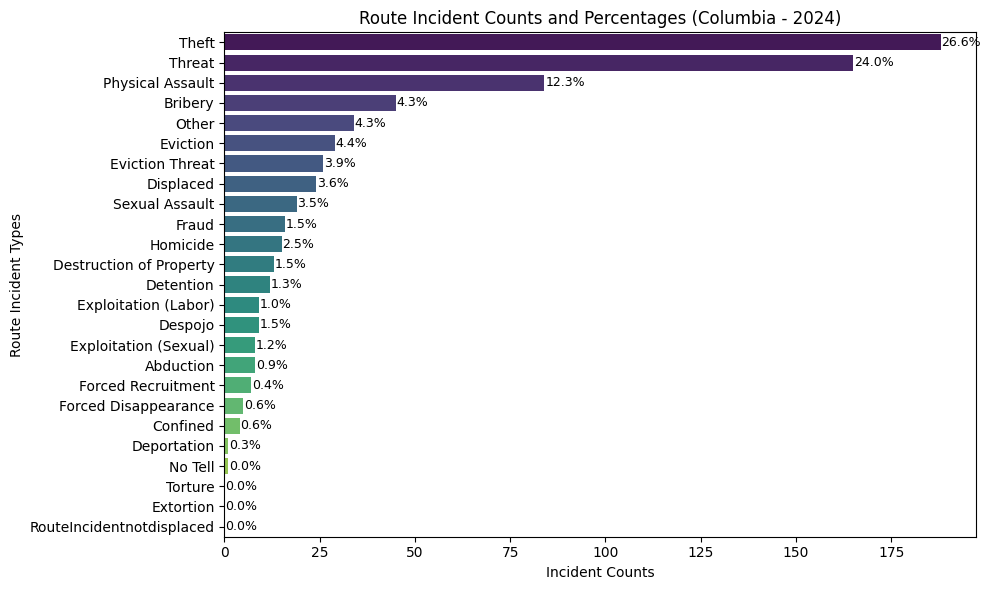

In [89]:
# Step 1: Define the renaming function
def rename_incident_columns(column_name):
    # Define a mapping for better readability
    mapping = {
        'theft': 'Theft',
        'threat': 'Threat',
        'physicalAssaul': 'Physical Assault',
        'bribery': 'Bribery',
        'other': 'Other',
        'eviction': 'Eviction',
        'evictionthreat': 'Eviction Threat',
        'displaced': 'Displaced',
        'sexualAssault': 'Sexual Assault',
        'fraud': 'Fraud',
        'homicide': 'Homicide',
        'destrProperty': 'Destruction of Property',
        'detention': 'Detention',
        'Exploitwork': 'Exploitation (Labor)',
        'despojo': 'Despojo',
        'Exploitsex': 'Exploitation (Sexual)',
        'abduction': 'Abduction',
        'forcedrecruit': 'Forced Recruitment',
        'forcedisappear': 'Forced Disappearance',
        'confine': 'Confined',
        'deportation': 'Deportation',
        'notell': 'No Tell',
        'torture': 'Torture',
        'extors': 'Extortion',
        'incidentnotdisplaced': 'Incident (Not Displaced)'
    }
    
    # Remove the 'RouteIncidentType_' prefix and map using the dictionary
    new_name = column_name.replace('RouteIncidentType_', '')
    return mapping.get(new_name, new_name)  # Default to original name if no mapping is found

# Step 2: Filter data for the year 2024
df_2024 = aggregated_df[aggregated_df['yr'] == 2024]

# Step 3: Aggregate count values by summing across all regions for 2024
incident_sums = df_2024[incident_columns].sum()

# Step 4: Create the list of percentage columns by appending '_percentage' to each column name in incident_columns
incident_percentage_columns = [col + '_percentage' for col in incident_columns]

# Step 5: Calculate the average percentage for each incident type across all regions
incident_percentages = df_2024[incident_percentage_columns].mean()

# Step 6: Remove the '_percentage' suffix from incident_percentages index
incident_percentages.index = incident_percentages.index.str.replace('_percentage', '')

# Step 7: Sort the incident sums in descending order
incident_sums_sorted = incident_sums.sort_values(ascending=False)

# Step 8: Align the percentages to the sorted incident sums
incident_percentages_sorted = incident_percentages[incident_sums_sorted.index]

# Step 9: Rename the columns
incident_percentages_sorted.index = [rename_incident_columns(index) for index in incident_percentages_sorted.index]
incident_sums_sorted.index = [rename_incident_columns(index) for index in incident_sums_sorted.index]

# Step 10: Exclude rows with 0 percentages
non_zero_percentages = incident_percentages_sorted[incident_percentages_sorted > 0]

# Step 11: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=incident_sums_sorted.values, y=incident_sums_sorted.index, palette='viridis')

# Add percentage text next to each bar
for i, v in enumerate(incident_sums_sorted):
    # Use the sorted percentage values to align with the sorted counts
    plt.text(v + 0.2, i, f"{incident_percentages_sorted.iloc[i]:.1f}%", va='center', ha='left', color='black', fontsize = 9)

# Add labels and title
plt.xlabel('Incident Counts')
plt.ylabel('Route Incident Types')
plt.title('Route Incident Counts and Percentages (Columbia - 2024)')

# Show the plot
plt.tight_layout()
plt.savefig('Columbia-routeIncidents_2024.jpeg')

plt.show()


/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_21370/3053691027.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incident_sums_sorted.values, y=incident_sums_sorted.index, palette='viridis')


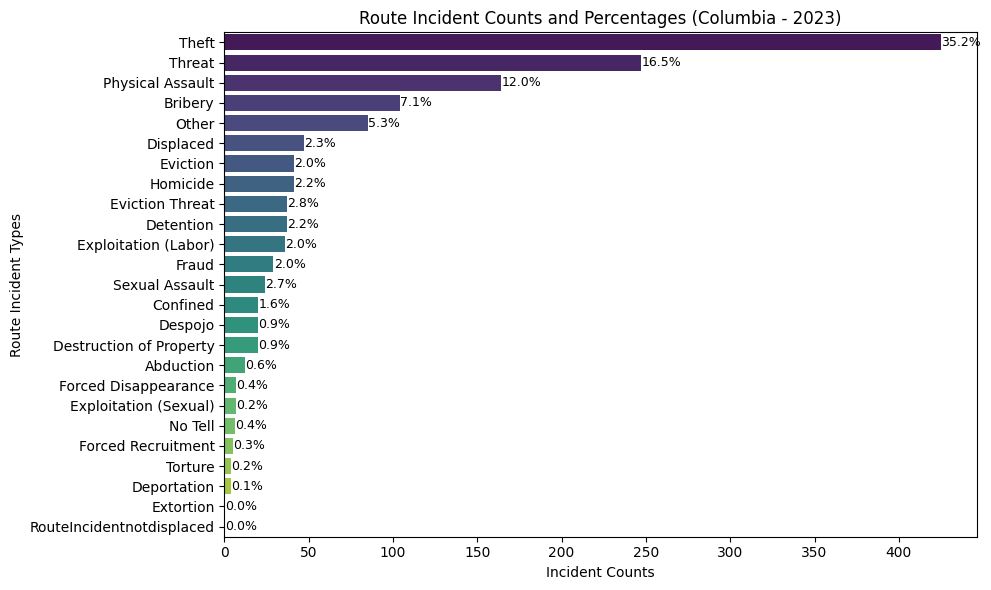

In [91]:
# Step 1: Define the renaming function
def rename_incident_columns(column_name):
    # Define a mapping for better readability
    mapping = {
        'theft': 'Theft',
        'threat': 'Threat',
        'physicalAssaul': 'Physical Assault',
        'bribery': 'Bribery',
        'other': 'Other',
        'eviction': 'Eviction',
        'evictionthreat': 'Eviction Threat',
        'displaced': 'Displaced',
        'sexualAssault': 'Sexual Assault',
        'fraud': 'Fraud',
        'homicide': 'Homicide',
        'destrProperty': 'Destruction of Property',
        'detention': 'Detention',
        'Exploitwork': 'Exploitation (Labor)',
        'despojo': 'Despojo',
        'Exploitsex': 'Exploitation (Sexual)',
        'abduction': 'Abduction',
        'forcedrecruit': 'Forced Recruitment',
        'forcedisappear': 'Forced Disappearance',
        'confine': 'Confined',
        'deportation': 'Deportation',
        'notell': 'No Tell',
        'torture': 'Torture',
        'extors': 'Extortion',
        'incidentnotdisplaced': 'Incident (Not Displaced)'
    }
    
    # Remove the 'RouteIncidentType_' prefix and map using the dictionary
    new_name = column_name.replace('RouteIncidentType_', '')
    return mapping.get(new_name, new_name)  # Default to original name if no mapping is found

# Step 2: Filter data for the year 2024
df_2023 = aggregated_df[aggregated_df['yr'] == 2023]

# Step 3: Aggregate count values by summing across all regions for 2024
incident_sums = df_2023[incident_columns].sum()

# Step 4: Create the list of percentage columns by appending '_percentage' to each column name in incident_columns
incident_percentage_columns = [col + '_percentage' for col in incident_columns]

# Step 5: Calculate the average percentage for each incident type across all regions
incident_percentages = df_2023[incident_percentage_columns].mean()

# Step 6: Remove the '_percentage' suffix from incident_percentages index
incident_percentages.index = incident_percentages.index.str.replace('_percentage', '')

# Step 7: Sort the incident sums in descending order
incident_sums_sorted = incident_sums.sort_values(ascending=False)

# Step 8: Align the percentages to the sorted incident sums
incident_percentages_sorted = incident_percentages[incident_sums_sorted.index]

# Step 9: Rename the columns
incident_percentages_sorted.index = [rename_incident_columns(index) for index in incident_percentages_sorted.index]
incident_sums_sorted.index = [rename_incident_columns(index) for index in incident_sums_sorted.index]

# Step 10: Exclude rows with 0 percentages
non_zero_percentages = incident_percentages_sorted[incident_percentages_sorted > 0]

# Step 11: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=incident_sums_sorted.values, y=incident_sums_sorted.index, palette='viridis')

# Add percentage text next to each bar
for i, v in enumerate(incident_sums_sorted):
    # Use the sorted percentage values to align with the sorted counts
    plt.text(v + 0.2, i, f"{incident_percentages_sorted.iloc[i]:.1f}%", va='center', ha='left', color='black', fontsize = 9)

# Add labels and title
plt.xlabel('Incident Counts')
plt.ylabel('Route Incident Types')
plt.title('Route Incident Counts and Percentages (Columbia - 2023)')

# Show the plot
plt.tight_layout()
plt.savefig('Columbia-routeIncidents_2023.jpeg')

plt.show()


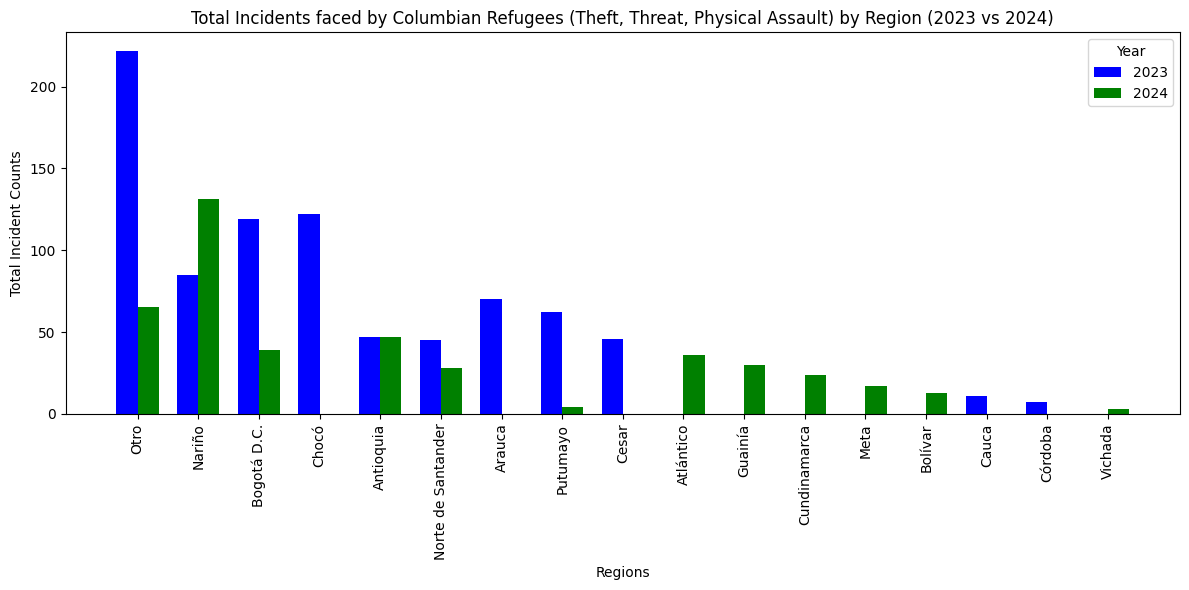

In [92]:
# Filter data for the years 2023 and 2024
df_2023 = df[df['yr'] == 2023]
df_2024 = df[df['yr'] == 2024]

# Columns to be analyzed (Theft, Threat, Physical Assault)
incident_columns_selected = ['RouteIncidentType_theft', 'RouteIncidentType_threat', 'RouteIncidentType_physicalAssaul']

# Sum of incidents for each region in 2023 and 2024
incident_sums_2023 = df_2023[incident_columns_selected].sum(axis=1)
incident_sums_2024 = df_2024[incident_columns_selected].sum(axis=1)

# Add region to the sums for each year
incident_sums_2023_df = pd.DataFrame({'Region': df_2023['region'], 'Incident_Sum_2023': incident_sums_2023})
incident_sums_2024_df = pd.DataFrame({'Region': df_2024['region'], 'Incident_Sum_2024': incident_sums_2024})

# Aggregate the incident sums by region (sum all incidents of the year per region)
incident_sums_2023_sorted = incident_sums_2023_df.groupby('Region')['Incident_Sum_2023'].sum()
incident_sums_2024_sorted = incident_sums_2024_df.groupby('Region')['Incident_Sum_2024'].sum()

# Merge the two DataFrames based on 'Region', and fill missing values with 0
incident_combined = pd.merge(incident_sums_2023_sorted, incident_sums_2024_sorted, on='Region', how='outer').fillna(0)

# Calculate the total incidents for sorting
incident_combined['Total_Incident_Sum'] = incident_combined['Incident_Sum_2023'] + incident_combined['Incident_Sum_2024']

# Sort by total incidents in descending order
incident_combined_sorted = incident_combined.sort_values(by='Total_Incident_Sum', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))

# Bar positions for 2023 and 2024 (adjust the position of 2024 bars)
bar_width = 0.35
index = range(len(incident_combined_sorted))

# Plot 2023 incidents (blue)
plt.bar(index, incident_combined_sorted['Incident_Sum_2023'], width=bar_width, color='blue', label='2023')

# Plot 2024 incidents (green), shifted by bar_width
plt.bar([i + bar_width for i in index], incident_combined_sorted['Incident_Sum_2024'], width=bar_width, color='green', label='2024')

# Adding labels and title
plt.xlabel('Regions')
plt.ylabel('Total Incident Counts')
plt.title('Total Incidents faced by Columbian Refugees (Theft, Threat, Physical Assault) by Region (2023 vs 2024)')
plt.xticks([i + bar_width / 2 for i in index], incident_combined_sorted.index, rotation=90)  # Adjust x-ticks for correct labeling
plt.legend(title="Year")

# Show the plot
plt.tight_layout()
plt.savefig('Columbia_RouteIncidents_Regional.jpeg')

plt.show()

In [4]:
df = pd.read_csv("UNHCR COL 2020-2024.csv")

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_22182/2266335545.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,12,14,16,39,40,56,135,139,149,150,151,152,153,154,157,158,159,160,162,163,164,165,193,195,204,206,207,216,219,220,221,231,232,233,255) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("UNHCR COL 2020-2024.csv")


In [6]:
df['child_noscho_childwork'].value_counts()

child_noscho_childwork
0.0    9853
1.0      50
Name: count, dtype: int64